# Using VGG16

In [1]:
import numpy as np
from keras.applications import vgg16
from keras.preprocessing import image

/home/nbuser/anaconda3_420/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/nbuser/anaconda3_420/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/nbuser/anaconda3_420/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
model = vgg16.VGG16(weights='imagenet')

553418752/553467096 [============================>.] - ETA: 0s

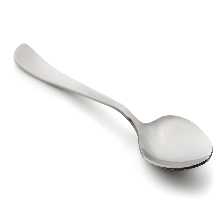

In [3]:
img = image.load_img('images/spoon.jpeg',target_size=(224,224))
img

In [4]:
# Convert to Numpy array
arr = image.img_to_array(img)
arr.shape

(224, 224, 3)

In [6]:
# expand dimension
arr = np.expand_dims(arr, axis = 0)
arr.shape

(1, 224, 224, 3)

In [7]:
# preprocessing
arr = vgg16.preprocess_input(arr)
arr

array([[[[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        ...,

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,


In [8]:
# predict
preds = model.predict(arr)
preds

array([[8.44573620e-08, 3.89304631e-07, 3.81987093e-07, 2.99430394e-06,
        3.04706755e-05, 1.56405004e-04, 1.96297551e-05, 5.69106184e-08,
        1.55567847e-07, 2.09416395e-08, 2.18210843e-07, 8.64055636e-08,
        1.40145914e-07, 1.38309042e-06, 2.69006257e-08, 4.38312426e-08,
        1.01769137e-06, 1.59495499e-07, 2.74518555e-07, 6.50163827e-07,
        1.09401856e-06, 7.74872547e-07, 5.44522933e-08, 8.13307608e-08,
        4.53290703e-08, 8.52787849e-08, 4.27181703e-08, 9.65319344e-08,
        2.15970132e-07, 1.06834285e-07, 2.91652835e-08, 4.16023269e-08,
        3.74264744e-08, 8.28798363e-08, 2.43751913e-07, 5.07891116e-08,
        1.69841996e-07, 1.09263752e-07, 1.37065484e-07, 3.46905651e-08,
        5.66829897e-07, 6.84126817e-08, 4.47843114e-08, 5.61311992e-08,
        5.66270408e-08, 7.42565565e-09, 9.62566062e-08, 1.42699506e-07,
        4.12455758e-09, 1.75292525e-09, 1.59966280e-08, 9.13648364e-07,
        1.57508771e-06, 2.62329809e-06, 2.34179875e-08, 9.452130

In [9]:
# predictions for top 5
vgg16.decode_predictions(preds,top = 5)

 8192/35363 [=====>........................] - ETA: 0s

[[('n03633091', 'ladle', 0.7431098),
  ('n04597913', 'wooden_spoon', 0.11186715),
  ('n04270147', 'spatula', 0.046126768),
  ('n04332243', 'strainer', 0.042931285),
  ('n03658185', 'letter_opener', 0.01052541)]]

## Test using another image

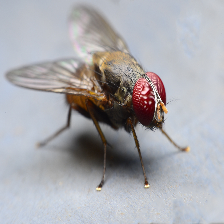

In [10]:
img2 = image.load_img('images/fly.jpeg',target_size=(224,224))
img2

In [11]:
arr2 = image.img_to_array(img2)
arr2 = np.expand_dims(arr2,axis=0)
arr2 = vgg16.preprocess_input(arr2)
preds2 = model.predict(arr2)
vgg16.decode_predictions(preds2, top=5)

[[('n02190166', 'fly', 0.997769),
  ('n02206856', 'bee', 0.0013271904),
  ('n02219486', 'ant', 0.00063573837),
  ('n02264363', 'lacewing', 9.11452e-05),
  ('n02256656', 'cicada', 2.9562365e-05)]]